<a href="https://colab.research.google.com/github/valsson-group/UNT-Chem-4660-5660-Fall2025/blob/main/Python-Plot-IR-Spectrum/Plot_IR_Spectra_Sept23-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manipulation of Data and Plotting It Using Using Python

In this notebook we show how we can use either Numpy or awk to manipulate data and then use Matplotlib to plot the data.



We first import the numpy and matplotlib packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

## Loading the Datasets

The first step is to load the datasets we want to plot.

Since we are here runnig this notebook on Google Colab, we need to upload the datafiles onto the runtime instance we are using. You can do this by selecting the folder icon here on the left and dragging the files there.

**Note these files are only temporarily saved there and will be deleted once this runtime is terminated. Thus, do not use this save or keep files**.

Once we have uploaded the data files, we will load the data into a numpy array using the `np.loadtxt("<name-of-datafile>")` function, where `<name-of-datafile>` is the name of a given data file that we want to load. The filename should be  enclosed in parenthesis.

### Example
Here we will use the `azobenzene_ir-spectra_gas-phase.dat` data file with the experimental IR spectra that we downlaod from the course Github repo as an example. We will load this data file as
```
ir_exp = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
```
will load the data from the file `azobenzene_ir-spectra_gas-phase.dat` into a numpy array with the variable name `ir_exp`.

We can access the first column of the data by using `ir_exp[:,0]` and the second column by using `ir_exp[:,1]` (note that python indexing starts from 0).

### Your Own Data

For your own data sets, you need to do a seperate `np.loadtxt` call for each data file, and use a seperate variable name for each data set.


In [2]:
# This is only needed to download example data
%%capture
!wget https://raw.githubusercontent.com/valsson-group/UNT-Chem-4660-5660-Fall2025/refs/heads/main/Python-Plot-IR-Spectrum/azobenzene_ir-spectra_gas-phase.dat
!wget https://raw.githubusercontent.com/valsson-group/UNT-Chem-4660-5660-Fall2025/refs/heads/main/Python-Plot-IR-Spectrum/azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat


In [3]:
!echo "First 10 lines of azobenzene_ir-spectra_gas-phase.dat:"
!head azobenzene_ir-spectra_gas-phase.dat
!echo "....."
!echo "Last 10 lines of azobenzene_ir-spectra_gas-phase.dat:"
!tail azobenzene_ir-spectra_gas-phase.dat
!echo " "

!echo "First 10 lines of azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat:"
!head azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat
!echo "....."
!echo "Last 10 lines of azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat:"
!tail azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat


First 10 lines of azobenzene_ir-spectra_gas-phase.dat:
550	0.002704
554	0.0018256
558	0.0010096
562	0.000504
566	0.0002848
570	0.0001616
574	0.00012639999999999998
578	0.000088
582	0.000041599999999999995
586	0.000056
.....
Last 10 lines of azobenzene_ir-spectra_gas-phase.dat:
3810	0.0000704
3814	0.00010719999999999999
3818	0.00016639999999999998
3822	0.0001456
3826	0.0001136
3830	0.0000848
3834	0.0000736
3838	0.00011679999999999999
3842	0.000144
3846	0.00014879999999999998
 
First 10 lines of azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat:
   300.00 999.99986585919089 
   300.37 999.99986785026942 
   300.74 999.99986996985820 
   301.11 999.99987221079039 
   301.48 999.99987456558017 
   301.85 999.99987702646411 
   302.22 999.99987958544386 
   302.59 999.99988223432888 
   302.96 999.99988496478011 
   303.33 999.99988776835289 
.....
Last 10 lines of azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat:
  3996.67 1000.00000000000000 
  3997.04 1000.00000000000000 
  3997.41 1000.0

In [4]:
# This is just an example
ir_exp = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
ir_orca = np.loadtxt("azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat")

print("Shape of ir_exp: {:}".format(ir_exp.shape))
print("Shape of ir_orca: {:}".format(ir_orca.shape))


# For your own data, you need to write a seperate np.loadtxt call for each data file,
# something like
# data_blyp = np.loadtxt("<name-of-datafile>")
# where you replace <name-of-datafile> with the filename.





Shape of ir_exp: (825, 2)
Shape of ir_orca: (10000, 2)


## Initial Plotting of Data

We will first plot the two data files separately to show that they are printed in two very different formats and that we need to manipulate the data to be able to plot them on the same plot.

## Plotting Data

We then plot the data by using the `plt.plot(...)` function in matplotlib.

### The plt.plot function
You need to have a seperate `plt.plot(...)` call for each data set. For example,
```
plt.plot(x=ir_exp[:,0],
         y=ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
```
where we plot the first column of the data set on the x-axis (`x=ir_exp[:,0]`) and the second column of the data on the y-axis (` y=ir_exp[:,1]`).

Note that it is not needed to incluude `x=` and `y=`, the following will give the same results (here the order of arguments decides want is on the x- and y-axis.

```
plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
```


### Labelling curves
You can label each curve with a seperate label by using the `label="<label-text>"` keyword. The legend that shows this labels is activated by the `plt.legend()` call.

### Axis labels
You can add a label to the x- and y-axis by using the `plt.xlabel("...")` and `plt.ylabel("...") functions.

### Range of y-axis
You change the range of the y-axis by using the `plt.ylim` function. For example, we set it to the range from 0 to 0.020 by using `plt.ylim([0,0.020])`. You will need to adjust this to your data.

### Saving figure
The figure will be shown in the notebook. We can also save the figure to a file by using the `plt.savefig("plot.png")` function. The extension used in filename determines the format (e.g., `.jpg` or `.png`). You can then download the file from the file manager here on the left side.

Note that this file is only temporarily saved there and will be deleted once this runtime is terminated. Thus, you should always download the figure to your computer right away.



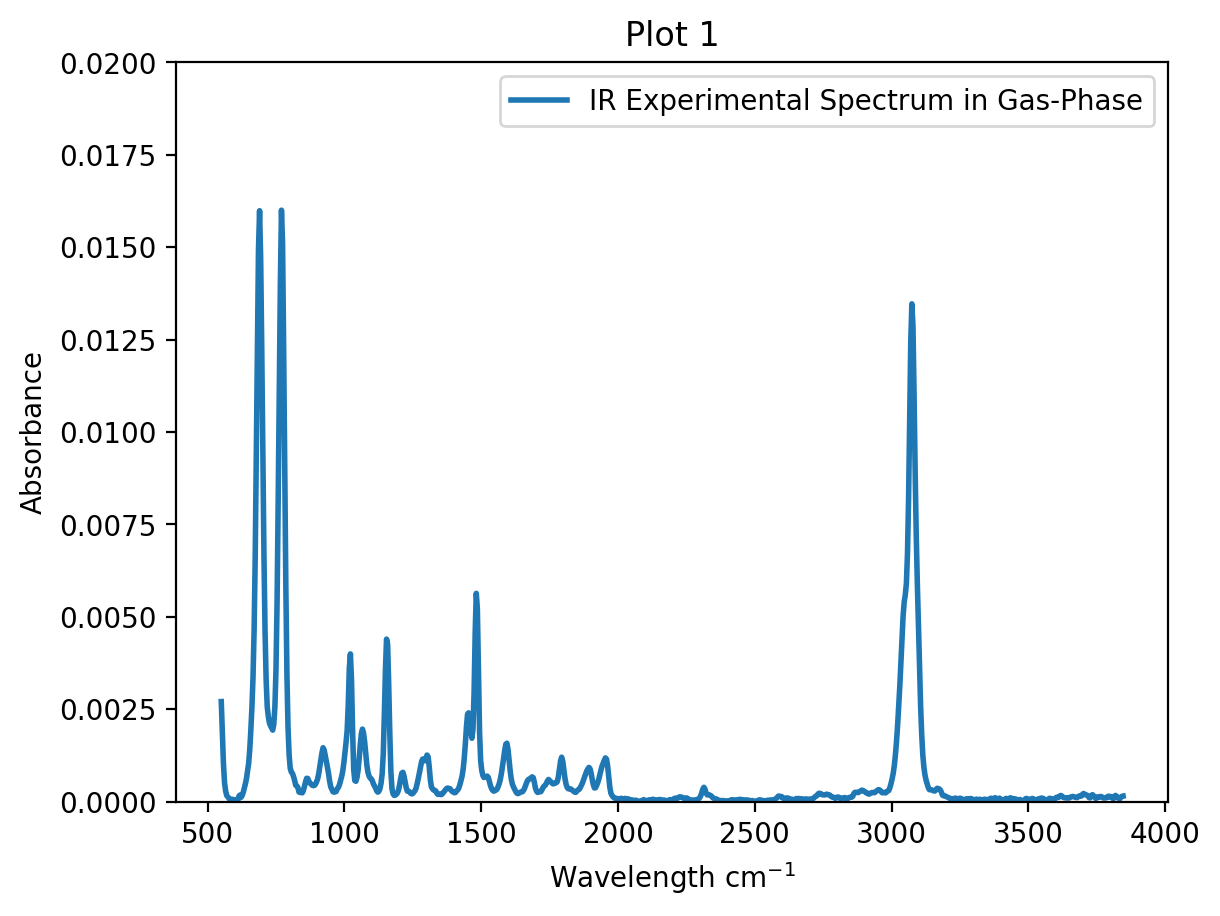

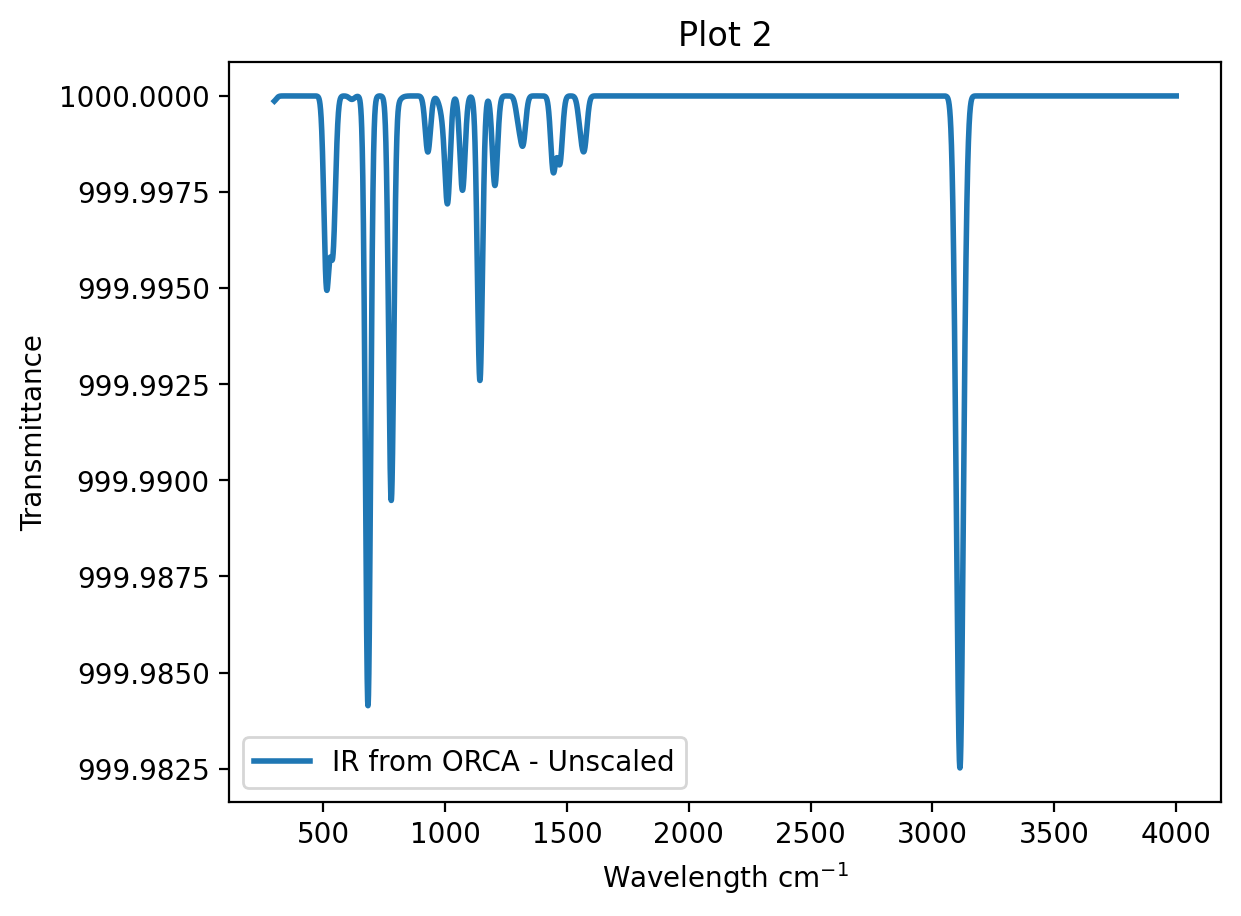

In [8]:
# Plot 1
plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.legend()
# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Plot 1")
# adding this command will show the current plot
plt.savefig("plot-1.png")
plt.show()


# Plot 2
plt.plot(ir_orca[:,0],
         ir_orca[:,1],
         "-",
         linewidth=2,
         label="IR from ORCA - Unscaled")
plt.legend()
# plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Transmittance")
plt.title("Plot 2")
# This is trick to fix the formatting of y-ticks, only needed for the Transmittance plots
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
# adding this command will show the current plot
plt.savefig("plot-2.png")
plt.show()






As we can see, the experimental data is given in terms of absorbance $A$, while the IR spectrum from ORCA is given in terms of the transmittance $T$. Thus, we need to manipulate the data.

Looking at the two plot, we can observe that here the relation between the two in this case appears to be

\begin{align}
T = 1000-A
\end{align}
or
\begin{align}
A = 1000-T
\end{align}

Note that the absorbance should be related to the transmittance via $A=-\log_{10}T$, but in this case that does not give a good comparision, and one needs to be perform additional analysis to use that equation. Therefore, here, we will just use the simple relations above.


## Way 1: Changing from Transmittance to Absorbance

We first show how we can change the IR spectrum from ORCA from transmittance format to absorbance format. For this we can just do a simple mathematical operation on the vector according to the equation above for the y-axis and save that in a new vector. The mathemetical operation is done elementwise on the all the elements in the vector.




In [9]:
# ir_orca[:,1] is the y-axis from IR spectrum from ORCA
# [:,1] means that we take all the rows in the 2nd column in the ir_orca matrix obtained from
# the data file. Note: Python indexing starts from 0.

# ir_orca_abs is a new vector
ir_orca_abs = 1000.0 - ir_orca[:,1]

# We can see that both vectors have the same size
print("Size of ir_orca[:,1]: {:d}".format(len(ir_orca[:,1])))
print("Size of ir_orca_abs: {:d}".format(len(ir_orca_abs)))
print("")
print("ir_orca[:,1]:")
print("- Minimum {:f}".format(np.min(ir_orca[:,1])))
print("- Maximum {:f}".format(np.max(ir_orca[:,1])))
print("ir_orca_abs")
print("- Minimum {:f}".format(np.min(ir_orca_abs)))
print("- Maximum {:f}".format(np.max(ir_orca_abs)))



Size of ir_orca[:,1]: 10000
Size of ir_orca_abs: 10000

ir_orca[:,1]:
- Minimum 999.982519
- Maximum 1000.000000
ir_orca_abs
- Minimum 0.000000
- Maximum 0.017481


Now we can plot the absorbance of both on the same plot

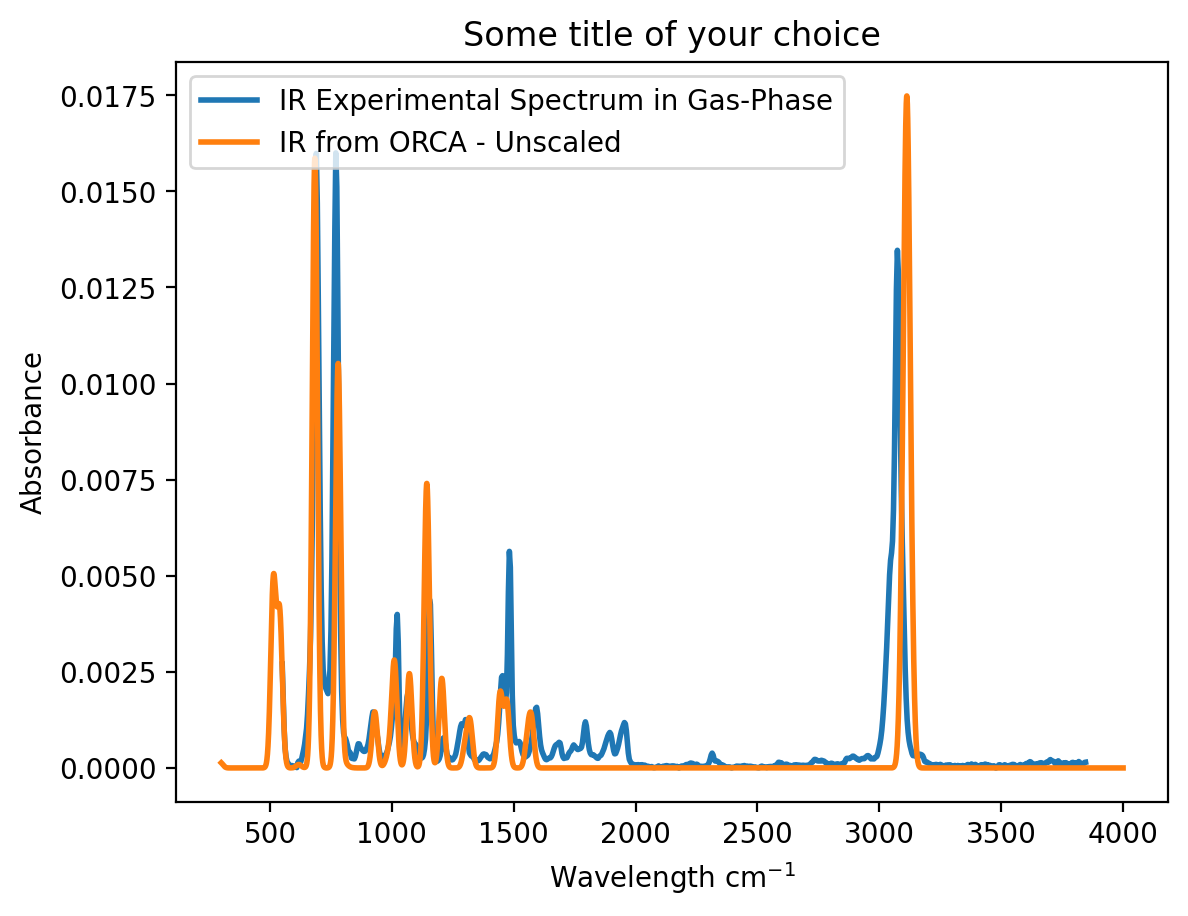

In [10]:
plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.plot(ir_orca[:,0],
         ir_orca_abs,
         "-",
         linewidth=2,
         label="IR from ORCA - Unscaled")
# This the range of y-axis, might need to be adjusted
#plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Some title of your choice")
plt.legend()
# You can add a plt.savefig(..) call to save the plot to a PNG file.
plt.savefig("Plot_Absorbance.png")
# adding this command will show the current plot
plt.show()



## Way 2: Changing from Absorbance to Transmittance

We now show how we can change the experimental IR spectrum from absorbance format to transmittance format.

In [11]:
# ir_exp[:,1] is the y-axis from the experimental IR spectrum

# ir_exp_trans is a new vector
ir_exp_trans = 1000.0 - ir_exp[:,1]

# We can see that both vectors have the same size
print("Size of ir_exp[:,1]: {:d}".format(len(ir_exp[:,1])))
print("Size of ir_exp_trans: {:d}".format(len(ir_exp_trans)))
print("")
print("ir_exp[:,1]:")
print("- Minimum {:f}".format(np.min(ir_exp[:,1])))
print("- Maximum {:f}".format(np.max(ir_exp[:,1])))
print("ir_exp_trans")
print("- Minimum {:f}".format(np.min(ir_exp_trans)))
print("- Maximum {:f}".format(np.max(ir_exp_trans)))

Size of ir_exp[:,1]: 825
Size of ir_exp_trans: 825

ir_exp[:,1]:
- Minimum 0.000000
- Maximum 0.016000
ir_exp_trans
- Minimum 999.984000
- Maximum 1000.000000


Now we can plot the transmittance of both on the same plot

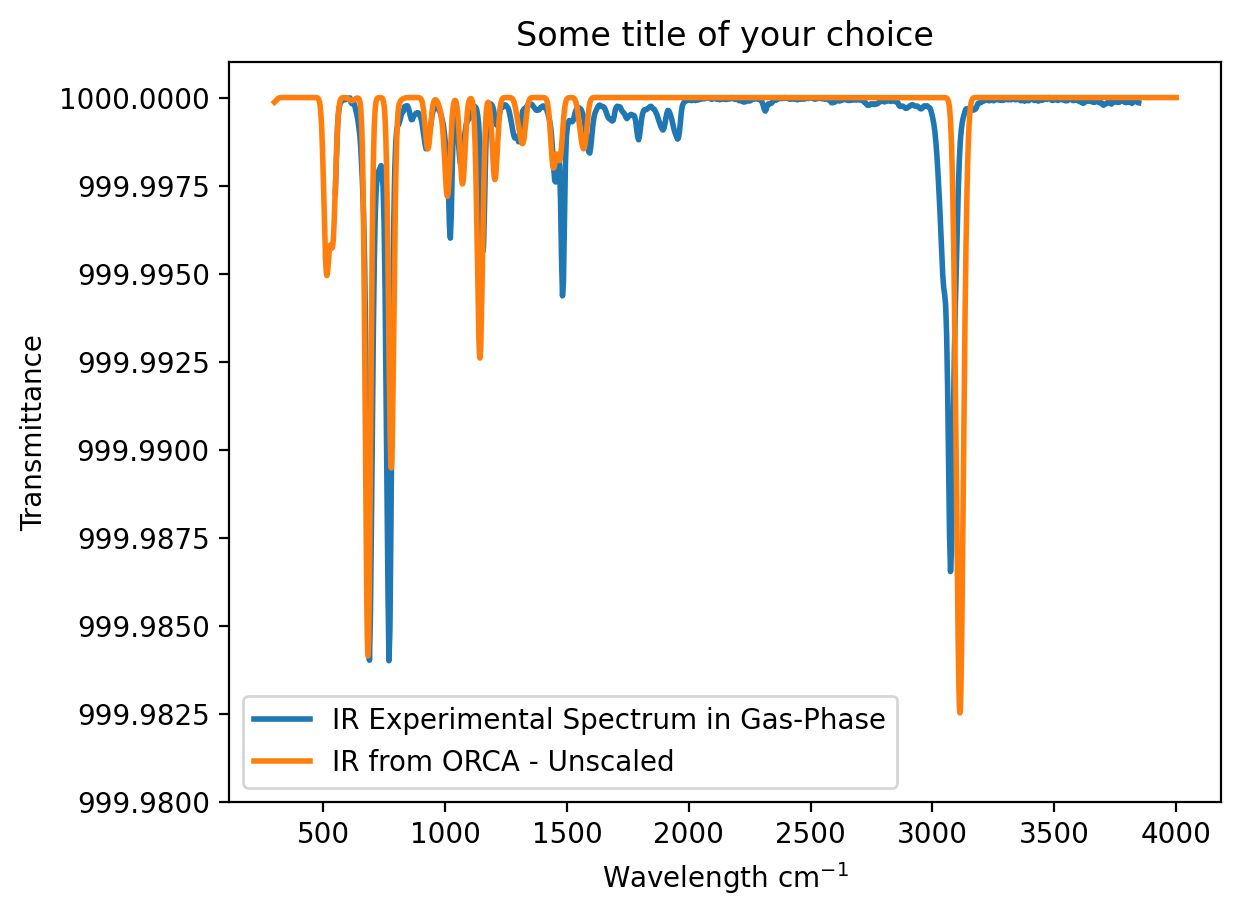

In [12]:
plt.plot(ir_exp[:,0],
         ir_exp_trans,
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.plot(ir_orca[:,0],
         ir_orca[:,1],
         "-",
         linewidth=2,
         label="IR from ORCA - Unscaled")
# This the range of y-axis, might need to be adjusted
plt.ylim([999.98,1000.001])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Transmittance")
plt.title("Some title of your choice")
plt.legend()
# This is trick to fix the formatting of y-ticks, only needed for the Transmittance plots
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
# adding this command will show the current plot

# You can add a plt.savefig(..) call to save the plot to a PNG file.
plt.savefig("Plot_Transmittance.png")

plt.show()

## Saving the Data to File

We can save the manipulated data to text files by using the `np.savetxt(..)` command from numpy (see https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html)

**Note: you will need to download the files if you want to keep them as they will be deleted when the Colab runtime is stopped.**





In [13]:
# Experimental IR spectrum in transmittance format
# Some hacks to get the data into the right way to combine it
ir_exp_cm1 = ir_exp[:,0]
ir_exp_cm1.shape=(-1,1)
ir_exp_trans.shape=(-1,1)
# saving to a file with the given filename
Filename="azobenzene_ir-spectra_gas-phase.transmittance.dat"
np.savetxt(Filename,
           X=np.concatenate(( ir_exp_cm1, ir_exp_trans ),axis=1)
          )

# ORCA IR spectrum in absorbance format
# Some hacks to get the data into the right way to combine it
ir_orca_cm1 = ir_orca[:,0]
ir_orca_cm1.shape=(-1,1)
ir_orca_abs.shape=(-1,1)
# saving to a file with the given filename
Filename="azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance.dat"
np.savetxt(Filename,
           X=np.concatenate(( ir_orca_cm1, ir_orca_abs ),axis=1)
          )




In [14]:
%%bash
echo "azobenzene_ir-spectra_gas-phase.transmittance.dat"
head azobenzene_ir-spectra_gas-phase.transmittance.dat
echo " "


echo "azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance.dat"
head azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance.dat

azobenzene_ir-spectra_gas-phase.transmittance.dat
5.500000000000000000e+02 9.999972960000000057e+02
5.540000000000000000e+02 9.999981744000000390e+02
5.580000000000000000e+02 9.999989904000000251e+02
5.620000000000000000e+02 9.999994960000000219e+02
5.660000000000000000e+02 9.999997151999999687e+02
5.700000000000000000e+02 9.999998384000000442e+02
5.740000000000000000e+02 9.999998736000000008e+02
5.780000000000000000e+02 9.999999119999999948e+02
5.820000000000000000e+02 9.999999583999999686e+02
5.860000000000000000e+02 9.999999440000000277e+02
 
azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance.dat
3.000000000000000000e+02 1.341408091093398980e-04
3.003700000000000045e+02 1.321497305752927787e-04
3.007400000000000091e+02 1.300301418041271972e-04
3.011100000000000136e+02 1.277892096140931244e-04
3.014800000000000182e+02 1.254344198287071777e-04
3.018500000000000227e+02 1.229735358947436907e-04
3.022200000000000273e+02 1.204145561359837302e-04
3.025899999999999750e+02 1.17765671120

In principle, you now load this data files and plot

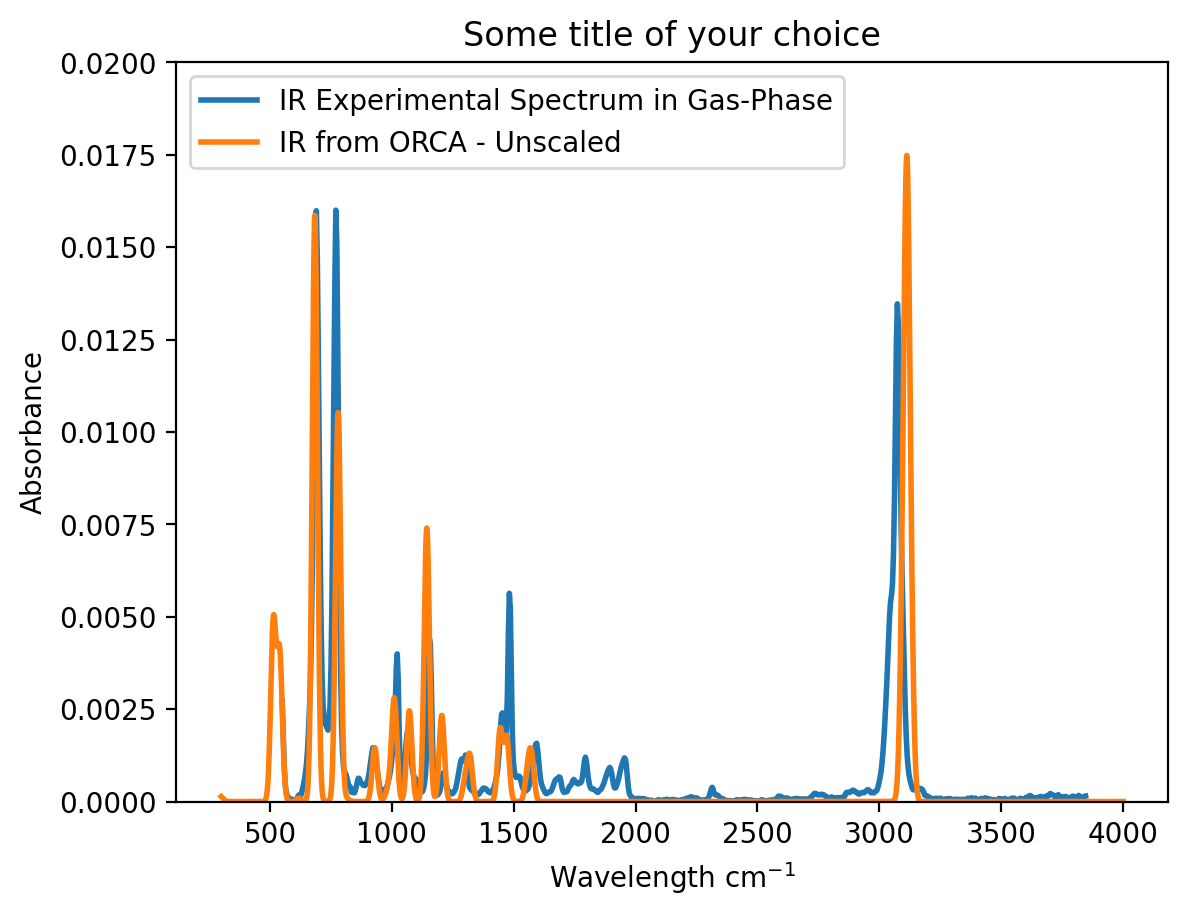

In [15]:
ir_exp2 = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
ir_orca2 = np.loadtxt("azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance.dat")


plt.plot(ir_exp2[:,0],
         ir_exp2[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.plot(ir_orca2[:,0],
         ir_orca2[:,1],
         "-",
         linewidth=2,
         label="IR from ORCA - Unscaled")
# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Some title of your choice")
plt.legend()
# You can add a plt.savefig(..) call to save the plot to a PNG file.
# adding this command will show the current plot
plt.show()



You can also save a file with three columns, that they are
1. cm^1
2. Absorbance
3. Transmittance



In [16]:
# Experimental IR spectrum
# Some hacks to get the data into the right way to combine it
ir_exp_cm1 = ir_exp[:,0]
ir_exp_cm1.shape=(-1,1)
ir_exp_abs = ir_exp[:,1]
ir_exp_abs.shape=(-1,1)
ir_exp_trans.shape=(-1,1)
# saving to a file with the given filename
Filename="azobenzene_ir-spectra_gas-phase.abs-trans.dat"
np.savetxt(Filename,
           X=np.concatenate((ir_exp_cm1, ir_exp_abs, ir_exp_trans),axis=1)
          )

In [ ]:
%%bash
head azobenzene_ir-spectra_gas-phase.abs-trans.dat

## Another way - Use the `awk` Commnand Line Tool

Another way that you can run in a terminal window is to use the `awk` command line tool that allows for manipulation of column seperated data files like we are working with here.

See for example:
- https://developer.ibm.com/tutorials/l-awk1/
- https://www.redhat.com/sysadmin/beginners-guide-gawk

**Here the `%%bash` command means that the content of this cell is run as a bash command, you can also run this command in the terminal on cruntch4**


In [17]:
%%bash
awk '{printf "%24.12f  %24.12f\n",$1,1000.0-$2}' azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat > azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance-2.dat

echo "azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance-2.dat"
head azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance-2.dat

azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance-2.dat
        300.000000000000            0.000134140809
        300.370000000000            0.000132149731
        300.740000000000            0.000130030142
        301.110000000000            0.000127789210
        301.480000000000            0.000125434420
        301.850000000000            0.000122973536
        302.220000000000            0.000120414556
        302.590000000000            0.000117765671
        302.960000000000            0.000115035220
        303.330000000000            0.000112231647


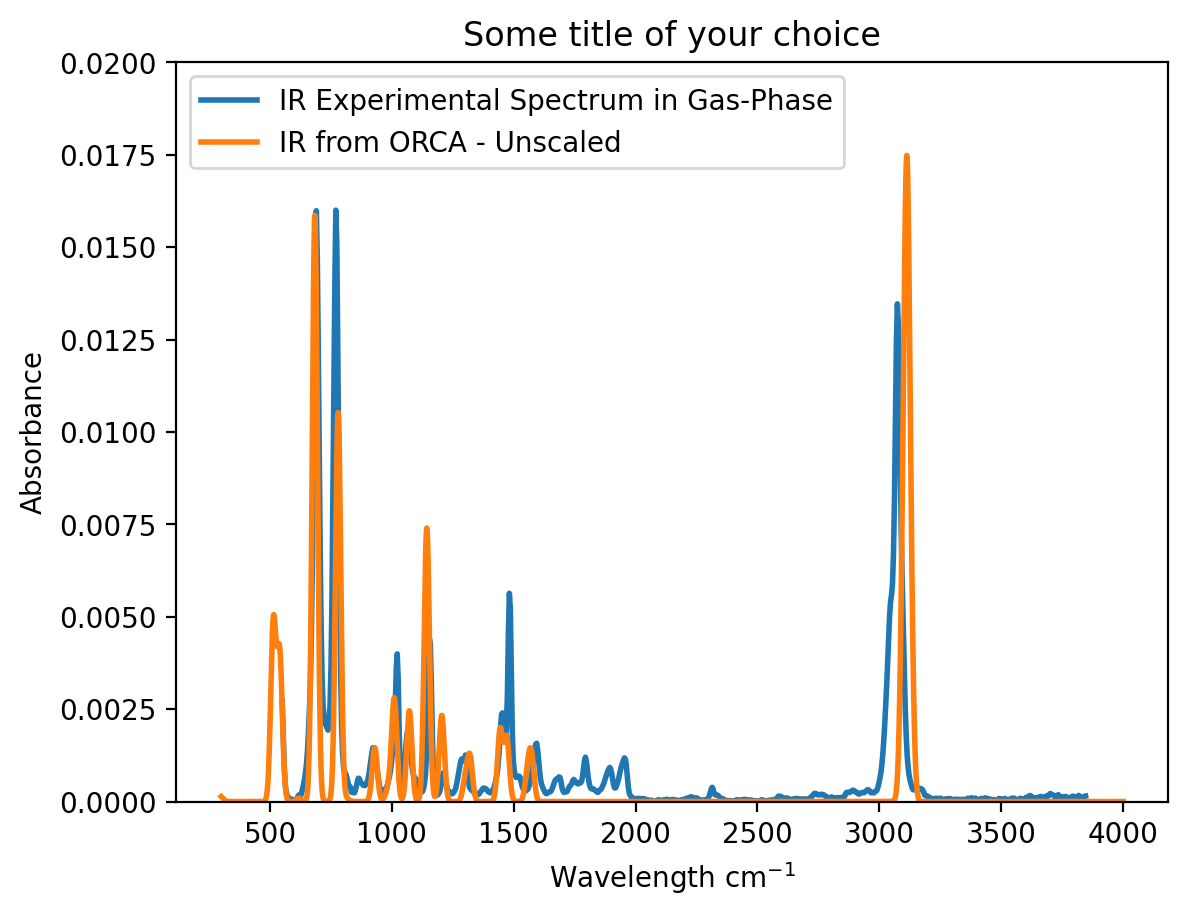

In [18]:
ir_exp3 = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
ir_orca3 = np.loadtxt("azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance-2.dat")


plt.plot(ir_exp3[:,0],
         ir_exp3[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.plot(ir_orca3[:,0],
         ir_orca3[:,1],
         "-",
         linewidth=2,
         label="IR from ORCA - Unscaled")
# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Some title of your choice")
plt.legend()
# You can add a plt.savefig(..) call to save the plot to a PNG file.
# adding this command will show the current plot
plt.show()

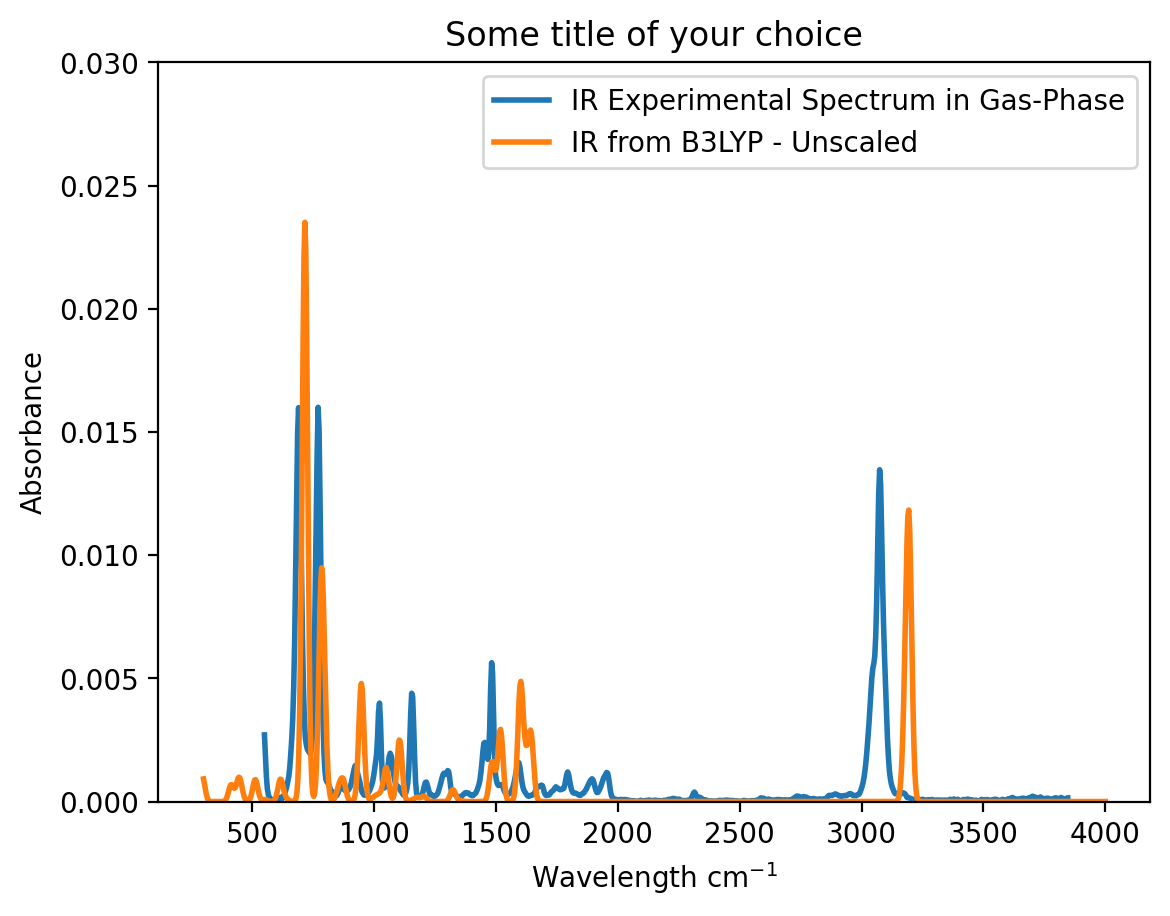

In [28]:
ir_exp = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
ir_blyp = np.loadtxt("azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat")
ir_b3lyp_unscaled = np.loadtxt("Azobenzene_cis_B3LYP-D3_def2-TZVPP_Freq_Orca_23Sep25-0930.out.ir.unscaled.dat")
ir_b3lyp_scaled = np.loadtxt("Azobenzene_cis_B3LYP-D3_def2-TZVPP_Freq_Orca_23Sep25-0930.out.ir.scaled.dat")


ir_blyp_abs = 1000 - ir_blyp[:,1]
ir_b3lyp_unscaled_abs = 1000 - ir_b3lyp_unscaled[:,1]
ir_b3lyp_scaled_abs = 1000 - ir_b3lyp_scaled[:,1]

plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")

# plt.plot(ir_blyp[:,0],
#          ir_blyp_abs,
#          "-",
#          linewidth=2,
#          label="IR from BLYP - Unscaled")

plt.plot(ir_b3lyp_unscaled[:,0],
         ir_b3lyp_unscaled_abs,
         "-",
         linewidth=2,
         label="IR from B3LYP - Unscaled")

# plt.plot(ir_b3lyp_scaled[:,0],
#          ir_b3lyp_scaled_abs,
#          "-",
#          linewidth=2,
#          label="IR from B3LYP - Scaled")


# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.030])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Some title of your choice")
plt.legend()
# You can add a plt.savefig(..) call to save the plot to a PNG file.
# adding this command will show the current plot
plt.savefig("plot-blyp-b3lyp.png")
plt.show()


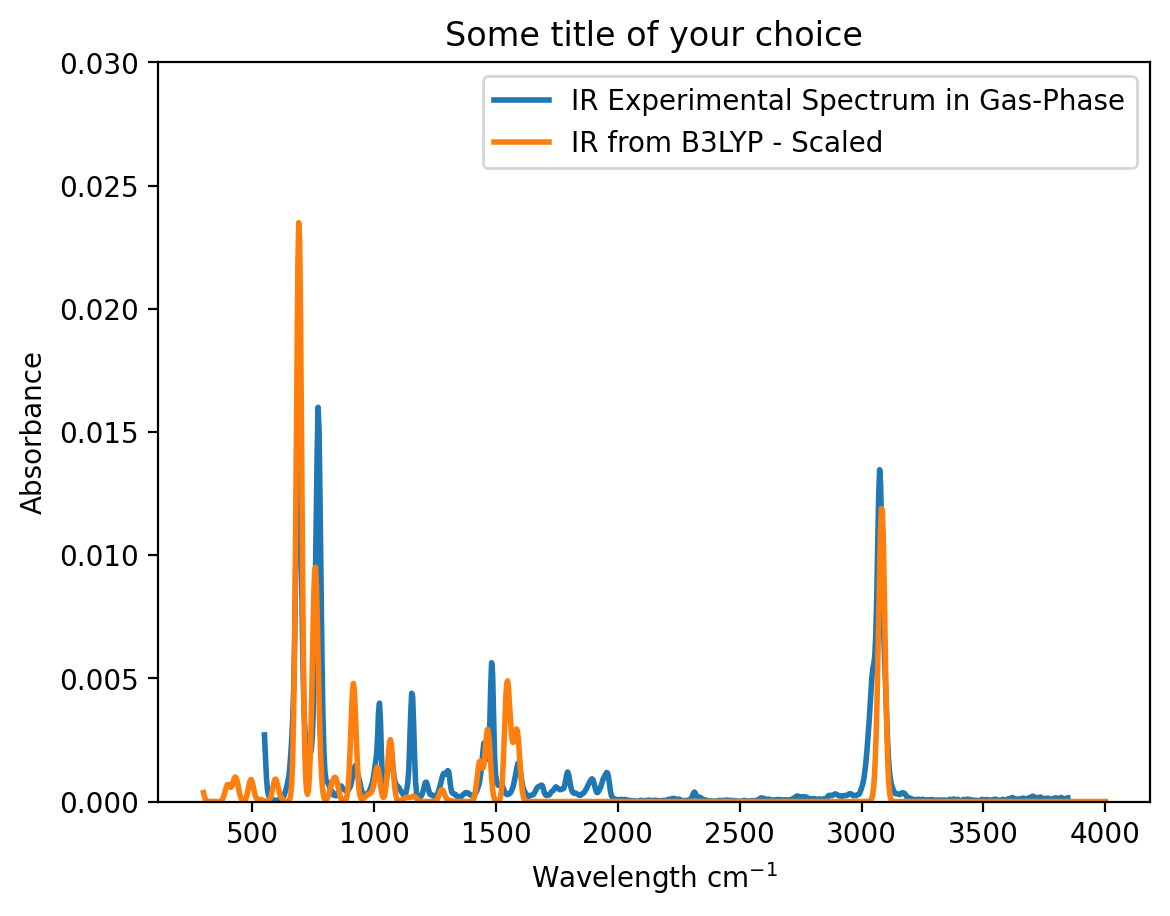

In [29]:
ir_exp = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
ir_blyp = np.loadtxt("azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat")
ir_b3lyp_unscaled = np.loadtxt("Azobenzene_cis_B3LYP-D3_def2-TZVPP_Freq_Orca_23Sep25-0930.out.ir.unscaled.dat")
ir_b3lyp_scaled = np.loadtxt("Azobenzene_cis_B3LYP-D3_def2-TZVPP_Freq_Orca_23Sep25-0930.out.ir.scaled.dat")


ir_blyp_abs = 1000 - ir_blyp[:,1]
ir_b3lyp_unscaled_abs = 1000 - ir_b3lyp_unscaled[:,1]
ir_b3lyp_scaled_abs = 1000 - ir_b3lyp_scaled[:,1]

plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")

# plt.plot(ir_blyp[:,0],
#          ir_blyp_abs,
#          "-",
#          linewidth=2,
#          label="IR from BLYP - Unscaled")

# plt.plot(ir_b3lyp_unscaled[:,0],
#          ir_b3lyp_unscaled_abs,
#          "-",
#          linewidth=2,
#          label="IR from B3LYP - Unscaled")

plt.plot(ir_b3lyp_scaled[:,0],
         ir_b3lyp_scaled_abs,
         "-",
         linewidth=2,
         label="IR from B3LYP - Scaled")


# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.030])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Some title of your choice")
plt.legend()
# You can add a plt.savefig(..) call to save the plot to a PNG file.
# adding this command will show the current plot
plt.savefig("plot-blyp-b3lyp-2.png")
plt.show()
